<h1>Procesamiento de datos a gran escala</h1>

# *Laboratorio No Supervisado 00 — Análisis Exploratorio del Dataset *Iris**

## Introducción

El presente laboratorio tiene como propósito introducir al estudiante al entorno de trabajo de **Apache Spark** dentro de **Databricks**, empleando la librería **PySpark** para la manipulación y análisis de datos masivos.  
Como ejemplo práctico, se utilizará el famoso conjunto de datos **Iris**, propuesto por el estadístico **Ronald A. Fisher (1936)**, el cual es ampliamente empleado en el aprendizaje automático y la estadística para ilustrar conceptos de clasificación, reducción de dimensionalidad y análisis exploratorio.

A través del desarrollo de este laboratorio, se busca familiarizarse con las operaciones básicas de lectura, transformación y visualización de datos en un entorno distribuido, comprendiendo las ventajas que ofrece Spark frente al procesamiento tradicional con Pandas o NumPy.

---

## Objetivo General

Realizar un **análisis exploratorio de datos (EDA)** utilizando PySpark sobre el dataset *Iris*, comprendiendo su estructura, características principales y posibles patrones mediante la manipulación, visualización y descripción estadística de las variables.

---

## Objetivos Específicos

1. Descargar y cargar el dataset *Iris* en un **DataFrame de Spark** con un esquema definido.
2. Explorar la estructura del conjunto de datos mediante operaciones básicas de **transformación y selección**.
3. Obtener **estadísticos descriptivos** (promedios, desviaciones, valores mínimos y máximos) de las variables numéricas.
4. Visualizar la distribución de las variables mediante **gráficas de dispersión, histogramas y boxplots**.
5. Comprender la relación entre las variables y su asociación con las diferentes especies de flores.
6. Consolidar el uso del entorno **Databricks** y las ventajas de PySpark en el manejo de grandes volúmenes de información.

---

## Referencias

- Fisher, R. A. (1936). *The use of multiple measurements in taxonomic problems.* Annals of Eugenics, 7(2), 179–188.  
- Apache Spark Documentation — [https://spark.apache.org/docs/latest/](https://spark.apache.org/docs/latest/)  
- Databricks Documentation — [https://docs.databricks.com](https://docs.databricks.com)


<h2>Clustering</h2>

#  Índice del Laboratorio No Supervisado 

1.  Identificación  
2.  Objetivos  
   - Objetivo General  
   - Objetivos Específicos  
3.  Introducción  
4.  Descripción del Dataset *Iris*  
5.  Herramientas Utilizadas  
6.  Fundamento Teórico  
7.  Carga y Lectura de Datos en PySpark  
8.  Análisis Exploratorio de Datos (EDA)  
   - Estadísticos Descriptivos  
   - Distribuciones y Visualizaciones  
9.  Análisis de Gráficas  
10.  Conclusiones  
11.  Repositorio del Proyecto


<h3>Cargar los datos</h3>

Para este ejercicio se estará utilizando el conjunto de datos Iris, la cual es una fuente en línea en formato CSV (valores separados por coma).
<p> Este set de datos posee diferentes medidas sobre la planta Iris y es famosamente utilizado como ejemplo en analítica de datos:
  </p>
Se utiliza este conjunto para ejemplificar la creación de clusters:

<ul>
  <li>descripción: <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank">https://archive.ics.uci.edu/ml/datasets/Iris</a></li>
  <li>fuente de datos: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data</a></li>
    <li>tipo de datos: csv</li>

Se va a utilizar la librería Pandas de Python para realizar la lectura de archivos. Se cargan los datos, se agregan cabeceras y se muestra el resultado:

In [66]:
# Instala wget en el entorno actual de Python
import sys
!{sys.executable} -m pip install wget


In [67]:
#BIBLIOTECAS INICIALES
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#Bibliotecas especializadas
from pylab import *

In [68]:
#Bibliotecas de PySpark, mllib Y contexto para levantar la sesion de pyspark

#Busqueda e inicialización para pyspark
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F #Acceso a todas las funciones
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession


import os

print("JAVA_HOME =", os.environ.get("JAVA_HOME"))
print("SPARK_HOME =", os.environ.get("SPARK_HOME"))


JAVA_HOME = None
SPARK_HOME = /mnt/sda1/Cluster/Spark


In [69]:
from pyspark.sql import SparkSession, SQLContext
from pyspark import SparkConf

# Configuración básica de Spark
configura = SparkConf().set("spark.scheduler.mode", "FAIR")
configura.setAppName("Lab-No Supervisado")

# Creación de la sesión Spark
spark04 = SparkSession.builder.config(conf=configura).getOrCreate()

# Contexto SQL para consultas
sqlContext = SQLContext(spark04.sparkContext, spark04)

# Contexto principal de Spark
contextoSpark04 = spark04.sparkContext

print("Sesión creada correctamente")
spark04


Sesión creada correctamente


In [70]:
# Leer datos desde archivo CSV
import wget

# URL del dataset y ruta local donde se guardará
url_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
local_path = "/mnt/sda1/Cluster/Almacen/CSV/varios/iris.data"

# Definición del esquema de columnas (nombres y tipos de datos)
schema = StructType([
    StructField("sepal_length", FloatType(), True),
    StructField("sepal_width",  FloatType(), True),
    StructField("petal_length", FloatType(), True),
    StructField("petal_width",  FloatType(), True),
    StructField("Species",      StringType(), True)
])

# Carga del archivo CSV en un DataFrame de Spark
df00 = spark04.read.format("csv").option("header", "false").schema(schema).load(local_path)

# Mostrar las primeras 5 filas
df00.show(5)


+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    Species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [71]:
# Muestra la estructura (esquema) del DataFrame: nombres y tipos de columnas
df00.printSchema()


root
 |-- sepal_length: float (nullable = true)
 |-- sepal_width: float (nullable = true)
 |-- petal_length: float (nullable = true)
 |-- petal_width: float (nullable = true)
 |-- Species: string (nullable = true)



In [72]:
# Importa funciones para manejar valores nulos o faltantes
from pyspark.sql.functions import col, isnan, when, count

# Cuenta los valores nulos o NaN en cada columna del DataFrame
df00.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df00.columns]).show()


+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|Species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+




### Aplicar Indexador a Columna "Species"

In [73]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Convierte la columna de texto "Species" a valores numéricos
indexer = StringIndexer(inputCol="Species", outputCol="Species_Indexed")
indexerModel = indexer.fit(df00)

# Aplica la conversión al DataFrame original
indexed_df = indexerModel.transform(df00)

# Muestra el resultado con la nueva columna codificada
indexed_df.show()


+------------+-----------+------------+-----------+-----------+---------------+
|sepal_length|sepal_width|petal_length|petal_width|    Species|Species_Indexed|
+------------+-----------+------------+-----------+-----------+---------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|            0.0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|            0.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|            0.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|            0.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|            0.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|            0.0|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|            0.0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|            0.0|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|            0.0|
|         4.9|        3.1|         1.5| 

In [74]:
# Muestra las especies únicas presentes en la columna "Species"
indexed_df.select('Species').distinct().collect()


[Row(Species='Iris-virginica'),
 Row(Species='Iris-versicolor'),
 Row(Species='Iris-setosa')]

<h3>Aplicar Algortimo K-Medias</h3>

Seleccione solo las columnas numéricas:

In [75]:
# Selecciona solo las columnas numéricas para el modelo de K-Means
df_kmeans = df00[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

# Muestra las primeras 5 filas del nuevo DataFrame
df_kmeans.show(5)


+------------+-----------+------------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|
+------------+-----------+------------+-----------+
|         5.1|        3.5|         1.4|        0.2|
|         4.9|        3.0|         1.4|        0.2|
|         4.7|        3.2|         1.3|        0.2|
|         4.6|        3.1|         1.5|        0.2|
|         5.0|        3.6|         1.4|        0.2|
+------------+-----------+------------+-----------+
only showing top 5 rows



### Formatear los datos usando Vector Assembler en los vectores los cuales serán usados como "features"

In [76]:
from pyspark.ml.feature import VectorAssembler

# Crea un vector con todas las columnas numéricas (excluye 'Species')
assembler = VectorAssembler(
    inputCols=df00.columns[:-1],
    outputCol='features'
)

# Genera una nueva columna 'features' con los valores combinados
df_datos = assembler.transform(df00)

# Muestra las primeras 5 filas con la nueva columna
df_datos.show(5)


+------------+-----------+------------+-----------+-----------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|    Species|            features|
+------------+-----------+------------+-----------+-----------+--------------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.09999990463256...|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.90000009536743...|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.69999980926513...|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.59999990463256...|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.5999999046...|
+------------+-----------+------------+-----------+-----------+--------------------+
only showing top 5 rows



### Escalar los datos

In [77]:
from pyspark.ml.feature import StandardScaler

# Escalador para normalizar las características numéricas
escalador = StandardScaler(
    inputCol="features",
    outputCol="scaledFeatures",
    withStd=True,   # ajusta la desviación estándar
    withMean=False  # no centra en el promedio
)

# Ajusta el modelo de escalado y transforma los datos
modeloEscalado = escalador.fit(df_datos)
df_datos = modeloEscalado.transform(df_datos)

# Muestra las columnas originales y las escaladas
df_datos.select("features", "scaledFeatures").show(5)


+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[5.09999990463256...|[6.15892840615775...|
|[4.90000009536743...|[5.91740202781600...|
|[4.69999980926513...|[5.67587507362994...|
|[4.59999990463256...|[5.55511188445906...|
|[5.0,3.5999999046...|[6.03816521698687...|
+--------------------+--------------------+
only showing top 5 rows



### Encontrar el número de clusters usando Silhouette Score

In [78]:
#Importing the model
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]

evaluador = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='scaledFeatures', \
                                metricName='silhouette', 
                                distanceMeasure='squaredEuclidean')
# Importar el modelo K-Means y el evaluador
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Lista para guardar los valores del puntaje silhouette
silhouette_score = []

# Configurar el evaluador del modelo de clustering
evaluador = ClusteringEvaluator(
    predictionCol='prediction',
    featuresCol='scaledFeatures',
    metricName='silhouette',
    distanceMeasure='squaredEuclidean'
)

# Probar diferentes valores de k (número de clusters)
for i in range(2, 10):
    kmeans = KMeans(featuresCol='scaledFeatures', k=i)
    KMeans_fit = kmeans.fit(df_datos)
    output = KMeans_fit.transform(df_datos)
    score = evaluador.evaluate(output)
    silhouette_score.append(score)
    print('Silhouette Score for k =', i, 'is', score)

for i in range(2,10):
    kmeans=KMeans(featuresCol='scaledFeatures', k=i)
    KMeans_fit=kmeans.fit(df_datos)
    output = KMeans_fit.transform(df_datos)   
    score = evaluador.evaluate(output)   
    silhouette_score.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.7714149115179729
Silhouette Score for k = 3 is 0.6542596062597003
Silhouette Score for k = 4 is 0.5879625766132187
Silhouette Score for k = 5 is 0.5331993477872825
Silhouette Score for k = 6 is 0.4983447232951671
Silhouette Score for k = 7 is 0.5124784751316555
Silhouette Score for k = 8 is 0.4587257664123233
Silhouette Score for k = 9 is 0.5004392897856162
Silhouette Score for k = 2 is 0.7714149115179729
Silhouette Score for k = 3 is 0.6542596062597003
Silhouette Score for k = 4 is 0.5879625766132187
Silhouette Score for k = 5 is 0.5331993477872825
Silhouette Score for k = 6 is 0.4983447232951671
Silhouette Score for k = 7 is 0.5124784751316555
Silhouette Score for k = 8 is 0.4587257664123233
Silhouette Score for k = 9 is 0.5004392897856162


### Visualización de silhouette scores

In [83]:
# Reinicia la lista para almacenar los valores del índice de silueta
silhouette_score = []

# Bucle para probar diferentes valores de k (número de clusters)
for i in range(2, 10):
    # Inicializa el modelo KMeans con el número de clusters actual
    kmeans = KMeans(featuresCol='scaledFeatures', k=i)
    
    # Ajusta (entrena) el modelo con los datos escalados
    KMeans_fit = kmeans.fit(df_datos)
    
    # Aplica el modelo al conjunto de datos para obtener las predicciones
    output = KMeans_fit.transform(df_datos)
    
    # Calcula el puntaje de silueta para evaluar la calidad del clustering
    score = evaluador.evaluate(output)
    
    # Guarda el puntaje en la lista
    silhouette_score.append(score)
    
    # Muestra el valor de silueta obtenido para este número de clusters
    print('Silhouette Score for k =', i, 'is', score)


Silhouette Score for k = 2 is 0.7714149115179729
Silhouette Score for k = 3 is 0.6542596062597003
Silhouette Score for k = 4 is 0.5879625766132187
Silhouette Score for k = 5 is 0.5331993477872825
Silhouette Score for k = 6 is 0.4983447232951671
Silhouette Score for k = 7 is 0.5124784751316555
Silhouette Score for k = 8 is 0.4587257664123233
Silhouette Score for k = 9 is 0.5004392897856162


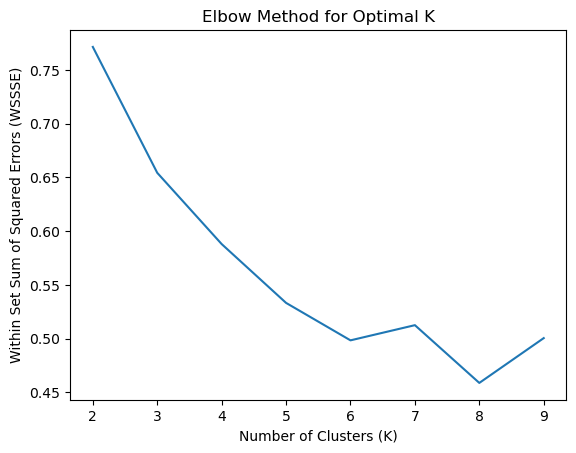

In [84]:
import matplotlib.pyplot as plt  # Librería para visualización de datos

# Grafica los valores del índice de silueta frente al número de clusters (k)
plt.plot(range(2,10), silhouette_score)

# Etiqueta para el eje X
plt.xlabel('Number of Clusters (K)')

# Etiqueta para el eje Y
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')

# Título del gráfico
plt.title('Elbow Method for Optimal K')

# Muestra la gráfica
plt.show()



¿Cúal k seleccionar? ¿Son satisfactorios los resultados de las diferentes k? 
- Se selecciona k=3 (¿porqué?)
- Compare los resultados para k=4, k=6, k=8

### Entrenar el modelo

In [85]:
# Se crea el modelo K-Means con k=3 y usando la columna de características escaladas
kmeans = KMeans(k=3, featuresCol="scaledFeatures", predictionCol="cluster")

# Se entrena (ajusta) el modelo con los datos
kmeans_model = kmeans.fit(df_datos)


### Evaluar el modelo k=3 Within Set Sum of Squared Errors (WSSSE) metric

In [86]:
# Se aplican las predicciones del modelo K-Means a los datos
output = KMeans_fit.transform(df_datos)

# Se evalúa el modelo usando la métrica de silueta (WSSSE)
wssse = evaluador.evaluate(output)

# Se imprime el valor obtenido de la métrica
print(f"Within Set Sum of Squared Errors (WSSSE) = {wssse}")


Within Set Sum of Squared Errors (WSSSE) = 0.5004392897856162


### Visualizar los Datos

In [87]:
from pyspark.ml.clustering import KMeans

# Crear el modelo KMeans usando las variables escaladas
kmeans = KMeans(featuresCol='scaledFeatures', k=3, seed=1)

# Entrenar el modelo con los datos
modelo = kmeans.fit(df_datos)

# Aplicar el modelo para asignar cada punto a un cluster
clustered_data = modelo.transform(df_datos)

# Mostrar los resultados
clustered_data.select("prediction", "scaledFeatures").show(5)


+----------+--------------------+
|prediction|      scaledFeatures|
+----------+--------------------+
|         1|[6.15892840615775...|
|         1|[5.91740202781600...|
|         1|[5.67587507362994...|
|         1|[5.55511188445906...|
|         1|[6.03816521698687...|
+----------+--------------------+
only showing top 5 rows



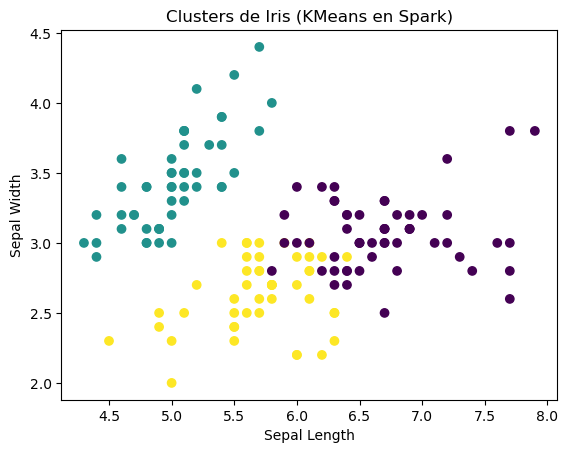

In [88]:
import matplotlib.pyplot as plt

# Convertir a Pandas
clustered_data_pd = clustered_data.toPandas()

# Agregar las columnas originales si las necesitas
clustered_data_pd["sepal_length"] = df00.select("sepal_length").toPandas()
clustered_data_pd["sepal_width"] = df00.select("sepal_width").toPandas()

# Graficar resultados
plt.scatter(
    clustered_data_pd["sepal_length"],
    clustered_data_pd["sepal_width"],
    c=clustered_data_pd["prediction"],
    cmap="viridis"
)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Clusters de Iris (KMeans en Spark)")
plt.show()


In [89]:
df_datos.columns

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'Species',
 'features',
 'scaledFeatures']

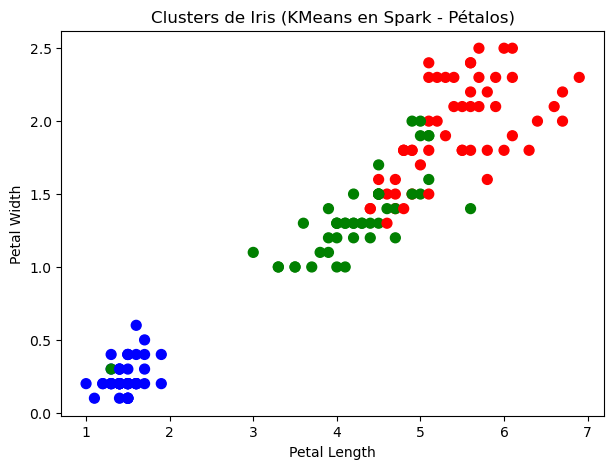

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Asignar colores por cluster (hasta 5 posibles clusters)
color = np.array(['red', 'blue', 'green', 'cyan', 'yellow'])

plt.figure(figsize=(7,5))
plt.scatter(
    x=clustered_data_pd["petal_length"],
    y=clustered_data_pd["petal_width"],
    c=color[clustered_data_pd["prediction"]],
    s=50
)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Clusters de Iris (KMeans en Spark - Pétalos)")
plt.show()



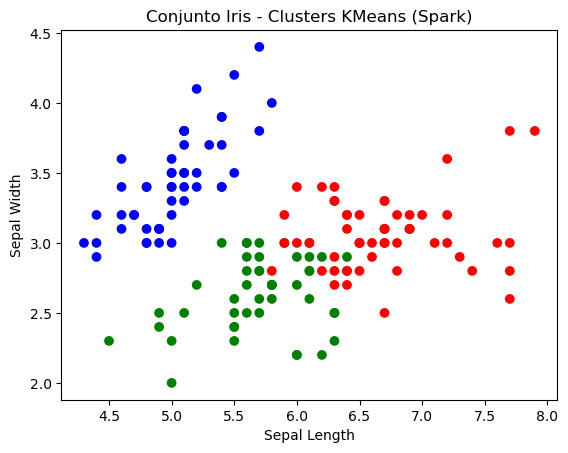

In [91]:
#Visualizando con Matplotlib
import matplotlib.pyplot as plt
color =np.array(['red','blue','green','cyan','yellow'])

scatter = plt.scatter(
    x=clustered_data_pd["sepal_length"],
    y=clustered_data_pd["sepal_width"],
    c=color[clustered_data_pd["prediction"]]
)
plt.title("Conjunto Iris - Clusters KMeans (Spark)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


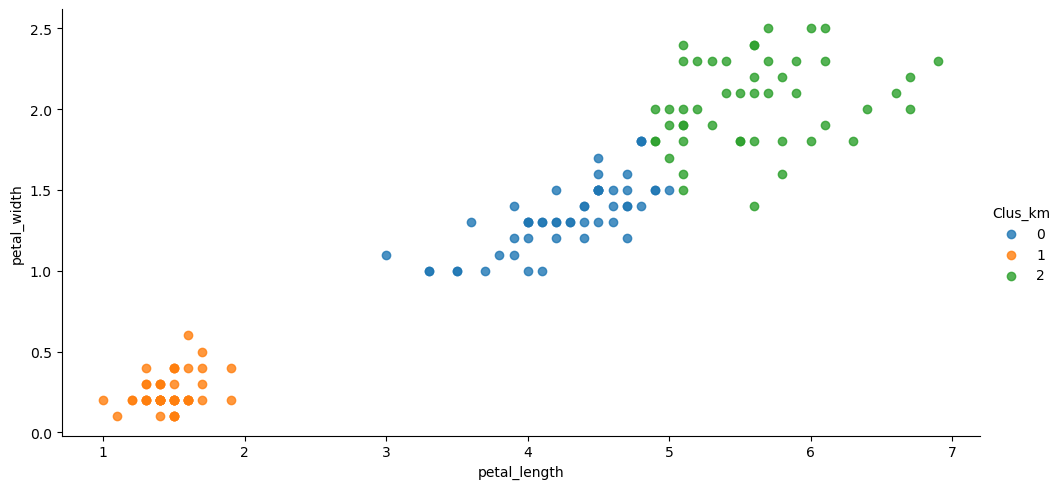

In [92]:
from sklearn.cluster import KMeans
import pandas as pd

# Convertir a pandas si no lo tienes aún
df = df00.toPandas()

# Aplicar KMeans
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df[["petal_length", "petal_width"]])

# Agregar etiquetas al DataFrame
df["Clus_km"] = k_means.labels_

# Visualizar con Seaborn
import seaborn as sns
sns.lmplot(x='petal_length', y='petal_width', data=df, hue='Clus_km', fit_reg=False, height=5, aspect=2)


In [93]:
spark04.stop()